In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [118]:
path = '/Users/jeremytournellec/Desktop/penguins.csv'

df = pd.read_csv(path)

print(df.head())

print(df.info())

df.shape

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


(344, 5)

In [119]:
df.boxplot() #permet de voir sur un graph si il y a des valeurs abhérantes dans nos données. On remarque pour flipper_length qu'il y a une valeur au delà de 4000 mm et une négative
#ce qui n'est pas possible

df.dropna(inplace=True ) #on retire toutes les lignes qui ont des NaN

clean_df = df[(df['flipper_length_mm'] < 4000) & (df['flipper_length_mm'] > 0)]

presence_nan = clean_df.isna().any().any()

# Afficher le résultat
if presence_nan:
    print("Le DataFrame contient au moins une valeur NaN.")
else:
    print("Le DataFrame ne contient pas de valeur NaN.")

Le DataFrame ne contient pas de valeur NaN.


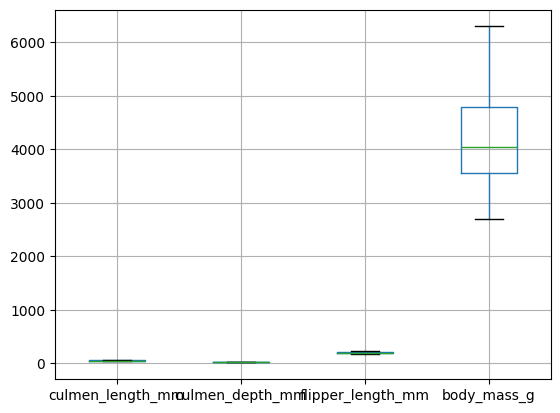

In [121]:
clean_df.boxplot()
plt.show()


In [122]:
clean_df2 = pd.get_dummies(clean_df).drop("sex_.", axis=1)

#clean_df['sex'] = clean_df['sex'].map({'MALE':0, 'FEMALE': 1 })
#print(clean_df) #on a mappé des str avec des chiffres, ce qui va nous aider en clustering

presence_nan = clean_df2.isna().any().any()

# Afficher le résultat
if presence_nan:
    print("Le DataFrame contient au moins une valeur NaN.")
else:
    print("Le DataFrame ne contient pas de valeur NaN.")

Le DataFrame ne contient pas de valeur NaN.


In [133]:
#mise à l'échelle maintenant pour être centré autour de 0 on crée une instance de l'objet standartscaller et on utilise sa mathode pour transformation des valeurs et on recrée le df en lui donnant les mêmes colonnes

echelle = StandardScaler()

X = echelle.fit_transform(clean_df2)

new_df = pd.DataFrame(data=X, columns=clean_df2.columns )

new_df.head()

presence_nan = new_df.isna().any().any()

# Afficher le résultat
if presence_nan:
    print("Le DataFrame contient au moins une valeur NaN.")
else:
    print("Le DataFrame ne contient pas de valeur NaN.")


correlation_matrix = new_df.corr()

# Affichage de la matrice de corrélation
print("Matrice de Corrélation :\n", correlation_matrix)

Le DataFrame ne contient pas de valeur NaN.
Matrice de Corrélation :
                    culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.220581           0.653979   
culmen_depth_mm           -0.220581         1.000000          -0.580990   
flipper_length_mm          0.653979        -0.580990           1.000000   
body_mass_g                0.592995        -0.477347           0.873499   
sex_FEMALE                -0.351037        -0.366416          -0.258720   
sex_MALE                   0.350497         0.370851           0.251867   

                   body_mass_g  sex_FEMALE  sex_MALE  
culmen_length_mm      0.592995   -0.351037  0.350497  
culmen_depth_mm      -0.477347   -0.366416  0.370851  
flipper_length_mm     0.873499   -0.258720  0.251867  
body_mass_g           1.000000   -0.426341  0.421352  
sex_FEMALE           -0.426341    1.000000 -0.994012  
sex_MALE              0.421352   -0.994012  1.000000  


In [186]:
#maintenant on peut fair eun PCA

pca = PCA(n_components=None)
new_var = pca.fit(new_df)
n_components = sum(new_var.explained_variance_ratio_>0.1)

pca = PCA(n_components=n_components)

#j'aurais aussi pu faire pca = PCA(n_components=0.95) pour garder 95% de variabilité

penguins_pca = pca.fit_transform(new_df)
print(n_components)

#donc pour garde que les 2 premières composantes (elles seont classées de celle avec le plus de variance à celle avec le moins) on garde les 2 qui rep + de 10% chacune de la var totale

correlation_matrix_pca = pca.components_
print("Matrice de Corrélation entre les Composantes Principales :\n", correlation_matrix_pca)
#ça a bien baissé

print(type(penguins_pca))
#pas oublier qu'on peut regarder un type avec type(data) !!!!

2
Matrice de Corrélation entre les Composantes Principales :
 [[ 0.43467409 -0.15776641  0.48020239  0.50924062 -0.38595413  0.38378023]
 [ 0.09408742 -0.61211564  0.30756805  0.1860741   0.49216838 -0.49498546]]
<class 'numpy.ndarray'>


  0%|          | 0/9 [00:00<?, ?it/s]/Applications/anaconda3/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/anaconda3/envs/myenv/

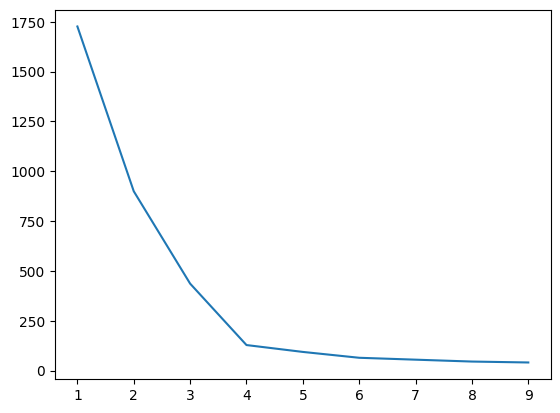

In [154]:
#on cherche le nombre de clusters optimal

import tqdm

inertias = []
nclust = range(1,10)


### and add its inertia to the inertia list
inertias=[]
for i in tqdm.tqdm(nclust): #permet d'afficher un curseur !!! (tqdm)
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0) #on def la methode de kmeans
    kmeans.fit(penguins_pca)  #on l'applique à features_unsupervised et on regarde l'inertie pour chaque nombre de clusters
    inertias.append(kmeans.inertia_)
    
plt.plot(nclust,inertias)
plt.show()

nclusters = 4

/Applications/anaconda3/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


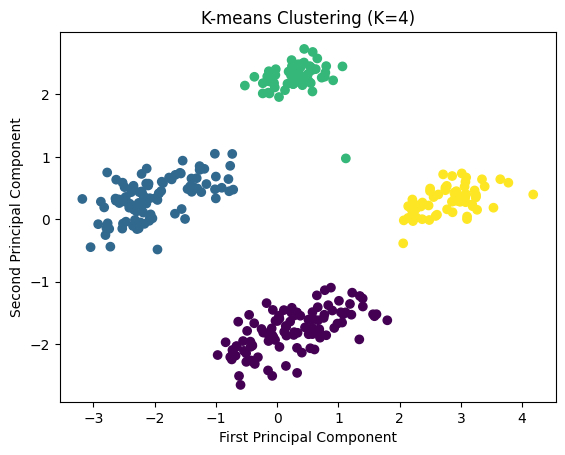

In [177]:
#maintenant on va tracer le K means avec 4 clusters

kmeans=KMeans(n_clusters=nclusters, init='k-means++',random_state=0)
kmeans.fit(penguins_pca)
#on a que 2 dimensions, pas besoin de faire un TSNE par ex :

plt.scatter(penguins_pca[:,0], penguins_pca[:,1], c=kmeans.labels_, cmap='viridis' ) #avec fit_transform on a appliqué la PCA à notre df et maintenant on a 2 colonnes. on met chaque colonne sur un axe et on prend les 340 lignes !!!!

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={nclusters})")
plt.show()

#on voit donc clairement 4 familles de penguins !!!

In [197]:

# Créez un nouveau pingouin
nouveau_pingouin = np.array([1.0, -0.22, 0.65, 0.59, -0.35, 0.35]).reshape(1, -1)

# Transformez les caractéristiques du nouveau pingouin en utilisant la PCA
nouveau_pingouin_pca = pca.transform(nouveau_pingouin)

# Prédisez le cluster auquel appartient le nouveau pingouin
cluster_prediction = kmeans.predict(nouveau_pingouin_pca)

print(f"Le nouveau pingouin est dans le cluster : {cluster_prediction[0]}")

Le nouveau pingouin est dans le cluster : 3


In [195]:
# Ajoutez une colonne "Cluster" au DataFrame d'origine
clean_df['Cluster'] = kmeans.labels_  #on a ajusté kmeans donc c'est bon...

# Affichez le DataFrame avec la nouvelle colonne
print(clean_df)

print(type(clean_df))

clean_df.to_csv('/Users/jeremytournellec/Desktop/penguins2.csv', index=False)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

        sex  Cluster  
0      MALE        0  
1    FEMALE        1  
2    FEMALE        1  
4    FEMALE        

/var/folders/t_/qn4dqp2s7kn4_b4mzs5z94_m0000gn/T/ipykernel_19521/931660340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cluster'] = kmeans.labels_  #on a ajusté kmeans donc c'est bon...
